## Exploratory Component

In the explorartory part we will attempt to answer a few questions about cities using the same previous cities dataset. We will be investigating the following:
- Is the CO2 emmission of cities generally dependent on the cities themselves or are they dependent on the country where the city is located in.
- Based on various social/ economic parameters, is it possible to predict the location (coordinates) of the city.
- Invesstigate what effects the modesharing of a city.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


 #### CO2 emmission of cities VS fossil fuel consumption of countries

In the prediction part of the project we attempted to merely predict the CO2 emmision per capita of a city. We are however curious about what impacts this CO2 emmission. We have found data which shows the total fossil fuel consumption per capita of every country over the last 50 years. We take the average of each country over the last three years and see if the highest fossil fuel consuming countries also have cities with high CO2 emmision. In other words we want to find out, is it the city itself which contributes to its own CO2 emission or is it the country which the city lies within which is contributing to how much the city emmites. 

In [42]:
column_names = ["Country", "Fossil fuel per capita (10MWh)"]
df = pd.DataFrame(columns=column_names) 
df['Country'] = fossil_fuels['Entity'].unique()

fossil_fuels=pd.read_csv("fossil-fuels-per-capita.csv")
g = fossil_fuels[fossil_fuels['Year']>2015].groupby(fossil_fuels.Entity).mean()
consumption = list(g['Fossil fuels per capita (kWh)'])

df['Fossil fuel per capita (10MWh)'] = list(np.array(consumption)*1e-4)
df = df.sort_values(by=['Fossil fuel per capita (10MWh)'], ascending=False).head(10)
df.head()

,Country,Fossil fuel per capita (10MWh)
57,Qatar,20.039897
61,Singapore,17.193791
72,Trinidad and Tobago,14.475155
76,United Arab Emirates,13.759359
39,Kuwait,10.995292


In [43]:
df2 = pd.read_excel("FINAL-COMBINED-DATASET.xlsx")
df2 = df2[['City', 'CO2 Emissions per Capita (metric tonnes)']]
df2 = df2.sort_values(by=['CO2 Emissions per Capita (metric tonnes)'], ascending=False).head(10)
df2.head()

,City,CO2 Emissions per Capita (metric tonnes)
36,Edmonton,44.100000
232,Ulsan,33.900000
310,New Orleans(LA),32.400000
100,Cologne-Bonn,27.600000
153,Kuwait City,27.258964


<BarContainer object of 10 artists>

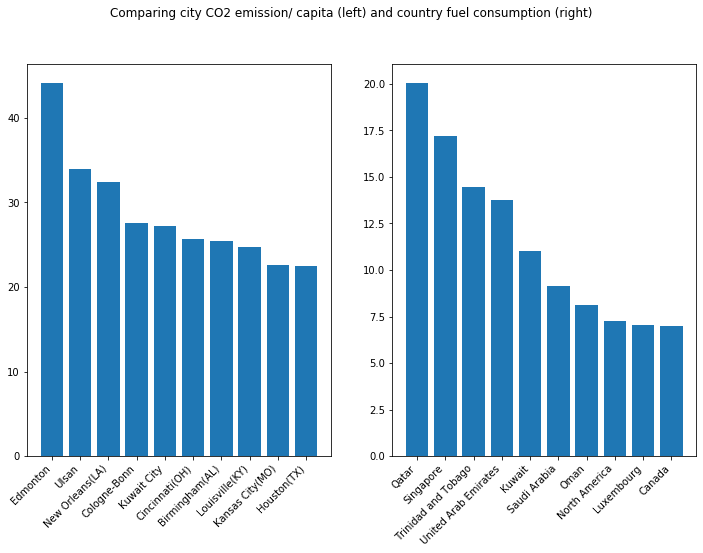

In [56]:
# plot both
# df = df.set_index('Country')
# df2 = df2.set_index('City')
x1 = df2['City']
y1 = df2['CO2 Emissions per Capita (metric tonnes)']
x2 = df['Country']
y2 = df['Fossil fuel per capita (10MWh)']
fig, axs = plt.subplots(1,2, figsize=(12,8))
fig.autofmt_xdate(rotation=45)
fig.suptitle('Comparing city CO2 emission/ capita (left) and country fuel consumption (right)')
axs[0].bar(x1, y1)
axs[1].bar(x2,y2)

The plot to the left are most polluting cities (CO2 emmission) per capita and on the right are the countries with the highest fossil fuel consuming countries per capita. There are a few of the highest polluting cities in the highest fuel consuming coutries which would indicate that there is a connection between the city and country. However if you look at the top four cities closly to see why they emmite so much CO2, you will find some interesting facts such as, Edmonton has some of the largest petrochemical and metal/ machinary industries in Canada. Ulsan is home to Korea's Hyundai motor manufacturing plant. New Orleans has some of the largest oil/ gas producers in the USA. Cologne-Bonn is one of euope's largest automotive industry. 

So when acessing the CO2 emission of a city, the largest parameter which impacts emission is probably the unique activites/ industries which are located in the city itself and not solely the country which the city is located.

 #### Predicting city location